In [1]:
import csv
import pandas as pd
import numpy as np

In [2]:
X_train = pd.read_csv("X_train.csv", header = None) 
X_train

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.289,-0.02030,-0.133,-0.995,-0.98300,-0.9140,-0.995,-0.9830,-0.9240,-0.935,...,-0.0743,-0.2990,-0.710,-0.1130,0.03040,-0.4650,-0.0184,-0.841,0.180,-0.0586
1,0.278,-0.01640,-0.124,-0.998,-0.97500,-0.9600,-0.999,-0.9750,-0.9580,-0.943,...,0.1580,-0.5950,-0.861,0.0535,-0.00743,-0.7330,0.7040,-0.845,0.180,-0.0543
2,0.280,-0.01950,-0.113,-0.995,-0.96700,-0.9790,-0.997,-0.9640,-0.9770,-0.939,...,0.4150,-0.3910,-0.760,-0.1190,0.17800,0.1010,0.8090,-0.849,0.181,-0.0491
3,0.279,-0.02620,-0.123,-0.996,-0.98300,-0.9910,-0.997,-0.9830,-0.9890,-0.939,...,0.4050,-0.1170,-0.483,-0.0368,-0.01290,0.6400,-0.4850,-0.849,0.182,-0.0477
4,0.277,-0.01660,-0.115,-0.998,-0.98100,-0.9900,-0.998,-0.9800,-0.9900,-0.942,...,0.0878,-0.3510,-0.699,0.1230,0.12300,0.6940,-0.6160,-0.848,0.185,-0.0439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.300,-0.05720,-0.181,-0.195,0.03990,0.0771,-0.282,0.0436,0.0604,0.211,...,-0.0702,-0.5880,-0.880,-0.1900,0.83000,0.2070,-0.4260,-0.792,0.239,0.0498
7348,0.274,-0.00775,-0.147,-0.235,0.00482,0.0593,-0.323,-0.0295,0.0806,0.117,...,0.1650,-0.3910,-0.681,0.0649,0.87600,-0.8790,0.4000,-0.772,0.253,0.0501
7349,0.273,-0.01700,-0.045,-0.218,-0.10400,0.2750,-0.305,-0.0989,0.3330,0.044,...,0.1950,0.0251,-0.304,0.0528,-0.26700,0.8640,0.7010,-0.779,0.249,0.0408
7350,0.290,-0.01880,-0.158,-0.219,-0.11100,0.2690,-0.310,-0.0682,0.3190,0.102,...,0.0139,0.0639,-0.344,-0.1010,0.70100,0.9370,-0.5890,-0.785,0.246,0.0253


In [3]:
Y_train = pd.read_csv('y_train.csv', header = None)
Y_train

,0
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


In [4]:
X_test = pd.read_csv("X_test.csv", header = None) 
Y_test = pd.read_csv("y_test.csv", header = None)

# KNN Model

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [6]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [7]:
predicted = model.predict(X_test)

In [8]:
print("Accuracy:",metrics.accuracy_score(Y_test, predicted))

Accuracy: 0.8907363420427553


In [13]:
print("F1-Score:",metrics.f1_score(Y_test, predicted, average = None))

F1-Score: [0.90583804 0.89596603 0.85122898 0.82188841 0.85354897 0.99813433]


# Ensemble Learning

In [14]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [15]:
clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0).fit(X_train, Y_train)
predicted = clf.predict(X_test)



/home/dheeraj/.local/lib/python3.6/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
print("Accuracy:",metrics.accuracy_score(Y_test, predicted))

Accuracy: 0.9514760773668137


In [19]:
### Measures how accurate the test was by looking at the precision and recall of the test

print("F1-Score:",metrics.f1_score(Y_test, predicted, average = None))

F1-Score: [0.9635468  0.94648478 0.9529703  0.9157128  0.92705448 1.        ]


# HMM Model

In [20]:
from hmmlearn import hmm

In [22]:
#Viterbi algorithm
# http://www.adeveloperdiary.com/data-science/machine-learning/implement-viterbi-algorithm-in-hidden-markov-model-using-python-and-r/

model = hmm.GaussianHMM(n_components=3, covariance_type="full")

model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])

model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
model.covars_ = np.tile(np.identity(2), (3, 1, 1))


KeyboardInterrupt: 

In [ ]:
model.fit(X_train)
predicted = model.predict(X_test)

In [ ]:
####
# Meeting 1 Notes
####
# F1-score needs to be used, for imbalanced datasets
# Plot distribution of labels to see if it is imbalanced (Needs to be oversampled)
# Dataset find mean, median, kurtosis
# Pearson's R between features

# Implement basic feature generation
# Neural Network
# Figure out why the results are ending up the way there are

# Label Distributions and Data Analysis

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [26]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.289,-0.02030,-0.133,-0.995,-0.98300,-0.9140,-0.995,-0.9830,-0.9240,-0.935,...,-0.0743,-0.2990,-0.710,-0.1130,0.03040,-0.4650,-0.0184,-0.841,0.180,-0.0586
1,0.278,-0.01640,-0.124,-0.998,-0.97500,-0.9600,-0.999,-0.9750,-0.9580,-0.943,...,0.1580,-0.5950,-0.861,0.0535,-0.00743,-0.7330,0.7040,-0.845,0.180,-0.0543
2,0.280,-0.01950,-0.113,-0.995,-0.96700,-0.9790,-0.997,-0.9640,-0.9770,-0.939,...,0.4150,-0.3910,-0.760,-0.1190,0.17800,0.1010,0.8090,-0.849,0.181,-0.0491
3,0.279,-0.02620,-0.123,-0.996,-0.98300,-0.9910,-0.997,-0.9830,-0.9890,-0.939,...,0.4050,-0.1170,-0.483,-0.0368,-0.01290,0.6400,-0.4850,-0.849,0.182,-0.0477
4,0.277,-0.01660,-0.115,-0.998,-0.98100,-0.9900,-0.998,-0.9800,-0.9900,-0.942,...,0.0878,-0.3510,-0.699,0.1230,0.12300,0.6940,-0.6160,-0.848,0.185,-0.0439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.300,-0.05720,-0.181,-0.195,0.03990,0.0771,-0.282,0.0436,0.0604,0.211,...,-0.0702,-0.5880,-0.880,-0.1900,0.83000,0.2070,-0.4260,-0.792,0.239,0.0498
7348,0.274,-0.00775,-0.147,-0.235,0.00482,0.0593,-0.323,-0.0295,0.0806,0.117,...,0.1650,-0.3910,-0.681,0.0649,0.87600,-0.8790,0.4000,-0.772,0.253,0.0501
7349,0.273,-0.01700,-0.045,-0.218,-0.10400,0.2750,-0.305,-0.0989,0.3330,0.044,...,0.1950,0.0251,-0.304,0.0528,-0.26700,0.8640,0.7010,-0.779,0.249,0.0408
7350,0.290,-0.01880,-0.158,-0.219,-0.11100,0.2690,-0.310,-0.0682,0.3190,0.102,...,0.0139,0.0639,-0.344,-0.1010,0.70100,0.9370,-0.5890,-0.785,0.246,0.0253


In [27]:
Y_train

,0
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


In [33]:
Y_train = Y_train.rename(columns = {0: 'label'})

In [38]:
data = [X_train, Y_train]
trainData = pd.concat(data, axis = 1)

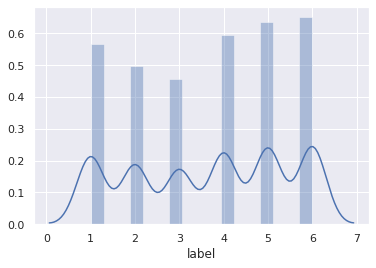

In [42]:
sns.distplot(trainData.label, hist = True)

# ######
# 1 WALKING
# 2 WALKING_UPSTAIRS
# 3 WALKING_DOWNSTAIRS
# 4 SITTING
# 5 STANDING
# 6 LAYING
# ######


# Pearson's Correlation

In [43]:
from scipy.stats import pearsonr

In [47]:
# Correlation Matrix

corrMatrix = trainData.corr()


In [48]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

KeyboardInterrupt: 